### Importando dependências

In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [282]:
%cd /content/drive/My Drive/titanic_kaggle/dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/content/drive/My Drive/titanic_kaggle/dataset


In [283]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [285]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
test_df = test_df.drop(columns=['PassengerId', 'Name','Cabin', 'Ticket'])

In [287]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [288]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [289]:
oe = OrdinalEncoder(dtype=np.intc, categories=[['male', 'female']])

train_df['Sex'] = oe.fit_transform(train_df['Sex'].to_numpy().reshape(-1,1))
test_df['Sex'] = oe.fit_transform(test_df['Sex'].to_numpy().reshape(-1,1))

oe1 = OrdinalEncoder(dtype=np.intc, categories=[['S', 'C', 'Q']])

train_df['Embarked'] = oe1.fit_transform(train_df['Embarked'].to_numpy().reshape(-1,1))
test_df['Embarked'] = oe1.fit_transform(test_df['Embarked'].to_numpy().reshape(-1,1))

<ipython-input-289-07b25ad2544d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sex'] = oe.fit_transform(train_df['Sex'].to_numpy().reshape(-1,1))
<ipython-input-289-07b25ad2544d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex'] = oe.fit_transform(test_df['Sex'].to_numpy().reshape(-1,1))
<ipython-input-289-07b25ad2544d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [290]:
pairs = []

# pairs tem todas as combinações das 8 features 2 a dois
for i in range(1, 8):
    for j in range(1, 8):
        if i != j:
            coli = train_df.columns[i]
            colj = train_df.columns[j]
            if ([coli, colj] not in pairs) and ([colj, coli] not in pairs):
                pairs.append([coli, colj])

print(len(pairs))

21


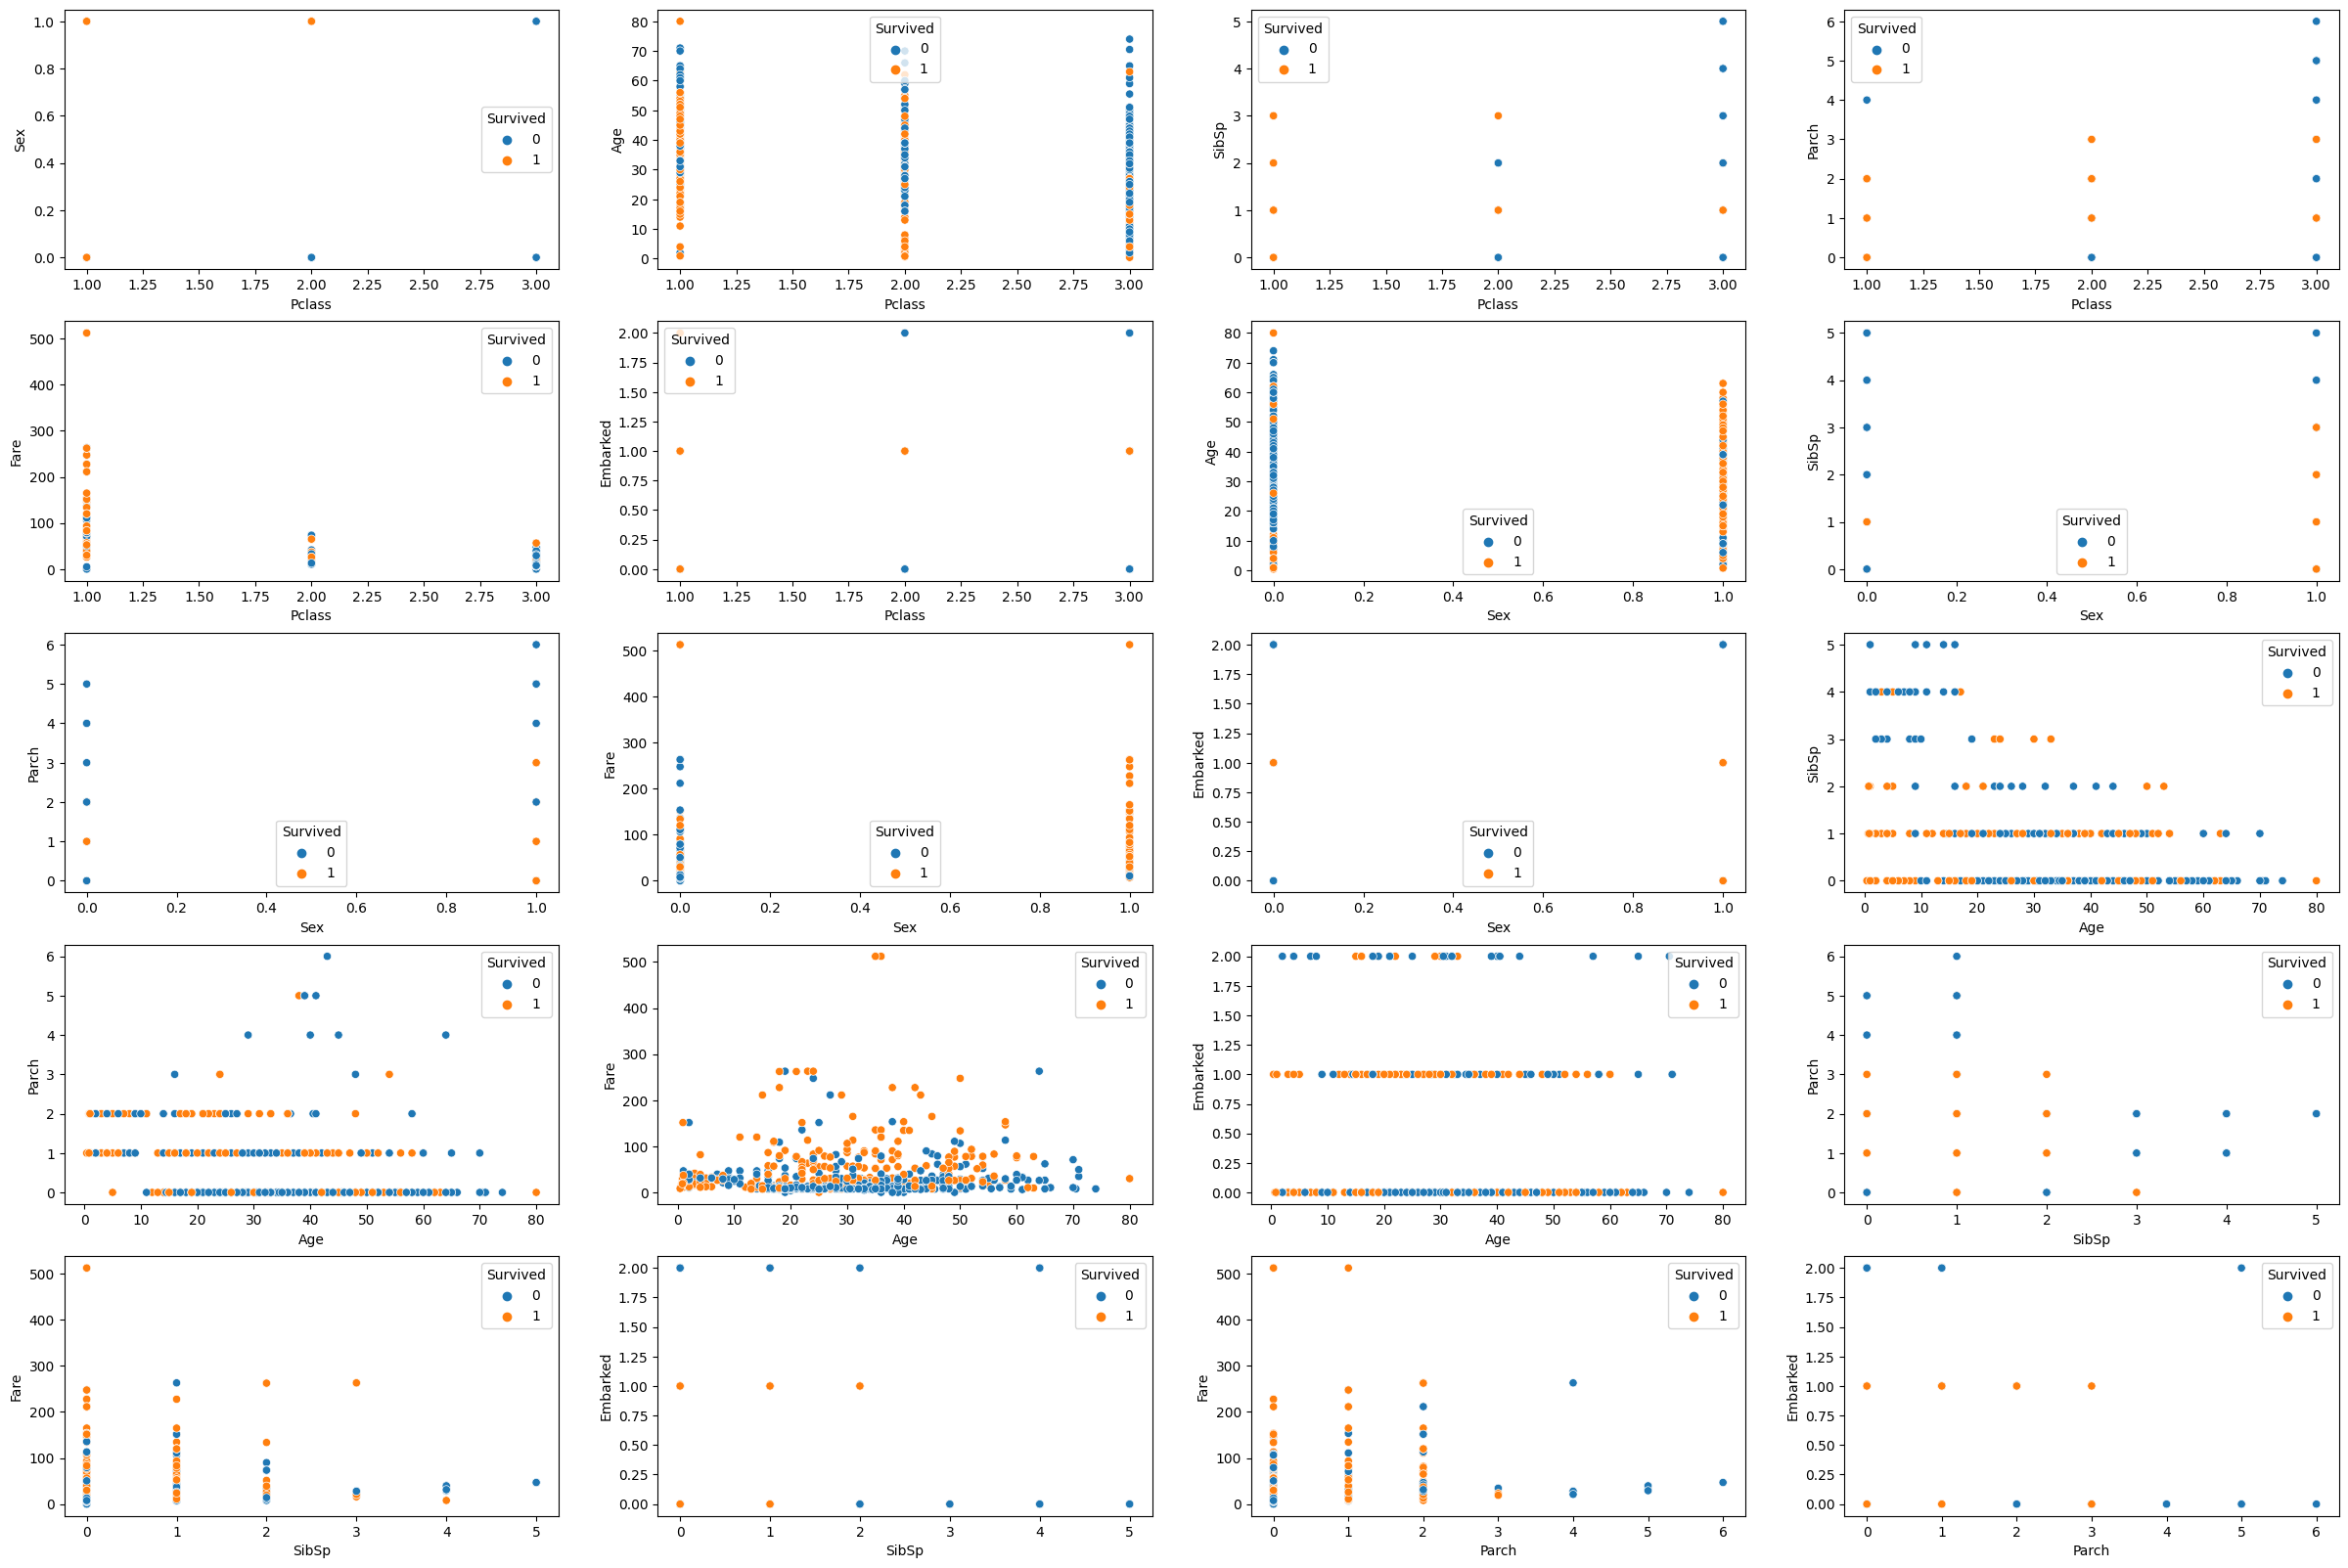

In [291]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30,20))

i=0
j=0
for k in range(0, 20):
    if j >= 4:
        j=0
        i += 1
    pair = pairs[k]
    data = train_df[[pair[0], pair[1], 'Survived']]
    sns.scatterplot(data=data, x=pair[0], y=pair[1], hue="Survived", ax=ax[i][j])
    j += 1

plt.show()

In [292]:
#train_df = train_df.drop(columns=['Survived'])

In [293]:
# Matriz de features X e vetor TARGET y
X_ = train_df.loc[:, train_df.columns != 'Survived']
y_ = train_df.Survived

# Separando a base pré-processada em bases treino e teste
# seguindo uma proporção de 25% para a de teste
X_train, X_test, y_train, y_test = train_test_split(
X_, y_, test_size=0.25, random_state=42)

In [294]:
# Inicializando scaler para realizar scaling nas
# matrizes de features de treino e teste
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [295]:
X_train.shape

(534, 7)

In [296]:
#y_train = pd.DataFrame(train_df.pop('Survived'))
#y_train.columns = ['Survived']
#x_train = train_df

In [297]:
seed = 10
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))


DecisionTreeClassifier accuracy score: 0.7752808988764045
